<a href="https://colab.research.google.com/github/Gumilevski/face_detection_with_CNNs/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras import applications
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import regularizers, optimizers, layers
import pandas as pd
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [0]:
from google.colab import drive
import sys
from importlib import reload
from importlib.machinery import SourceFileLoader

drive.mount('/content/drive')
DATA_MODULE_PATH = r'/content/drive/My Drive/Colab Notebooks/face_detection/data_script.py'
load_data_module = SourceFileLoader('data_script', DATA_MODULE_PATH).load_module()

# load_data_module = reload(load_data_module)

train_generator, valid_generator, test_generator = load_data_module.generate_data()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 15857 images.
Found 3965 images.
Found 2000 images.


In [0]:
AUX_MODULE_PATH = r'/content/drive/My Drive/Colab Notebooks/face_detection/auxiliary_methods.py'
aux_module = SourceFileLoader('auxiliary_methods', AUX_MODULE_PATH).load_module()
%cd /content/drive/My\ Drive/Colab\ Notebooks/face_detection/models

/content/drive/My Drive/Colab Notebooks/face_detection/models


In [0]:
base_model = applications.VGG16(weights = "imagenet", include_top=False, 
                                      input_shape = (256, 256, 3))
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(4, activation='linear'))

model.compile(optimizers.Adam(lr=4e-5), loss='mean_squared_error', metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_193 (Activation)  (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_

Epoch 1/30
247/247 [==============================] - 450s 2s/step - loss: 12899.5978 - acc: 0.6937 - val_loss: 6816.9832 - val_acc: 0.7320

Epoch 00001: val_loss improved from inf to 6816.98322, saving model to tl_weights_train_fc.h5
Epoch 2/30
247/247 [==============================] - 429s 2s/step - loss: 2868.4417 - acc: 0.7215 - val_loss: 1505.3712 - val_acc: 0.7335

Epoch 00002: val_loss improved from 6816.98322 to 1505.37115, saving model to tl_weights_train_fc.h5
Epoch 3/30
247/247 [==============================] - 427s 2s/step - loss: 1530.6435 - acc: 0.7216 - val_loss: 1437.6688 - val_acc: 0.7374

Epoch 00003: val_loss improved from 1505.37115 to 1437.66884, saving model to tl_weights_train_fc.h5
Epoch 4/30
247/247 [==============================] - 432s 2s/step - loss: 1469.9021 - acc: 0.7236 - val_loss: 1373.2713 - val_acc: 0.7394

Epoch 00004: val_loss improved from 1437.66884 to 1373.27131, saving model to tl_weights_train_fc.h5
Epoch 5/30
247/247 [======================

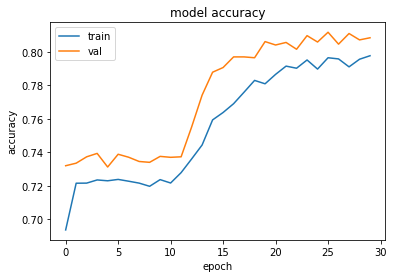

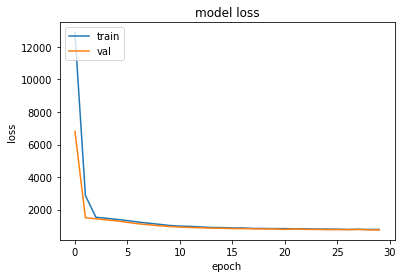

In [0]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("tl_weights_train_fc.h5", monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False)
early = EarlyStopping(monitor='val_loss', verbose=1, patience = 15)

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=30, callbacks=[early, checkpoint]
)

aux_module.plot_results(history)

In [0]:
base_model = applications.VGG16(weights = "imagenet", include_top=False, 
                                 input_shape = (256, 256, 3))
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(4, activation='linear'))

model.compile(optimizers.Adam(lr=1e-5), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

from keras.models import model_from_json
model.load_weights('tl_weights_train_fc.h5')

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
______________________

In [0]:
base_model.trainable = True

trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable
    

model.compile(optimizers.Adam(lr=1e-5), loss='mean_squared_error', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
__________

In [0]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

new_checkpoint = ModelCheckpoint("tl_weights_fine_tuned.h5", monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False)
new_early = EarlyStopping(monitor='val_loss', verbose=1, patience = 15)

new_history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=60, callbacks=[new_early, new_checkpoint]
)

aux_module.plot_results(history)

Epoch 1/60
247/247 [==============================] - 4990s 20s/step - loss: 709.5216 - acc: 0.8108 - val_loss: 633.1625 - val_acc: 0.8312

Epoch 00001: val_loss improved from inf to 633.16252, saving model to tl_weights_fine_tuned.h5
Epoch 2/60
247/247 [==============================] - 330s 1s/step - loss: 616.3192 - acc: 0.8317 - val_loss: 575.6575 - val_acc: 0.8408

Epoch 00002: val_loss improved from 633.16252 to 575.65752, saving model to tl_weights_fine_tuned.h5
Epoch 3/60
247/247 [==============================] - 320s 1s/step - loss: 552.6519 - acc: 0.8442 - val_loss: 515.0303 - val_acc: 0.8528

Epoch 00003: val_loss improved from 575.65752 to 515.03028, saving model to tl_weights_fine_tuned.h5
Epoch 4/60
247/247 [==============================] - 323s 1s/step - loss: 501.8739 - acc: 0.8591 - val_loss: 477.8334 - val_acc: 0.8686

Epoch 00004: val_loss improved from 515.03028 to 477.83339, saving model to tl_weights_fine_tuned.h5
Epoch 5/60
247/247 [============================

NameError: ignored

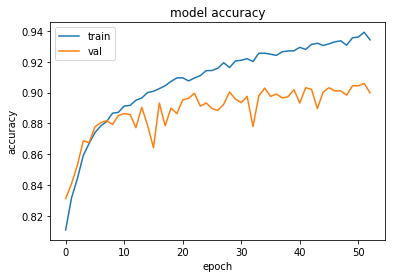

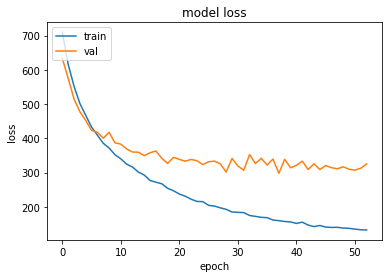

In [0]:
aux_module.plot_results(new_history)